In [769]:
import numpy as np
import scipy as sp
import scipy.stats as st
import matplotlib.pyplot as plt
gen = np.random.default_rng()
%matplotlib inline

In [770]:
def gillespie(Ns = [0,600,400]): # Ns = N0, N+, N-
    g = [0, 1, -1]
    N = np.sum(Ns)
    w = Ns / N
    c = [1,1, 1]
    seq = []
    cumulative = [0]
    counts = np.array([0, 0, 0])  #N-, N0, N+
    for j in range(N):
        a = [c[i] * (Ns[i] - counts[i]) / (N - j) for i in range(3)]
        a0 = sum(a)
        r1, r2 = gen.uniform(size=2)
        dt = 1/a0 * np.log(1/r1)
        mu = 0
        n = r2 * a0 - a[mu]
        while n>0:
            mu+=1
            n -=a[mu]
        next = mu
        seq.append(next)
        cumulative.append(cumulative[-1] + g[next])
        counts[next] += 1
    return np.array(cumulative)

In [771]:
def gillespie1(Ns = [0,600,400]):
    Ns = np.array(Ns)
    N = np.sum(Ns)
    cumulative = [0]
    for j in range(N):
        next = gen.choice([0,1,-1], p=Ns/(N-j))
        cumulative.append(cumulative[-1] + next)
        Ns[next] -= 1
    return np.array(cumulative)

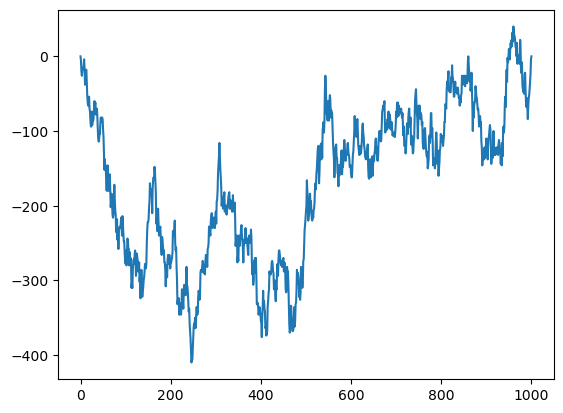

In [772]:
diffs = []
for m in range(100):
    diffs.append(gillespie() - gillespie1())
plt.plot(np.sum(diffs, axis = 0))
plt.show()

In [773]:
t = np.linspace(0, 1, 1001)
x = np.array([gillespie() for _ in range(100)])

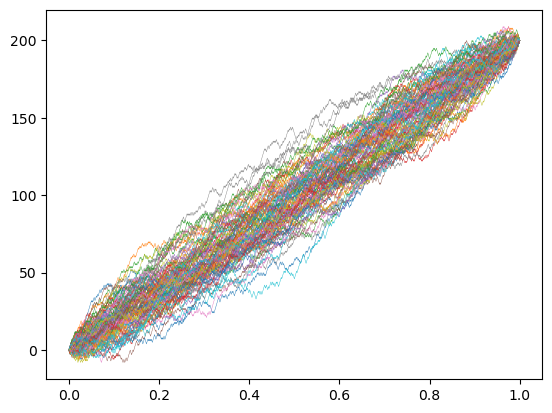

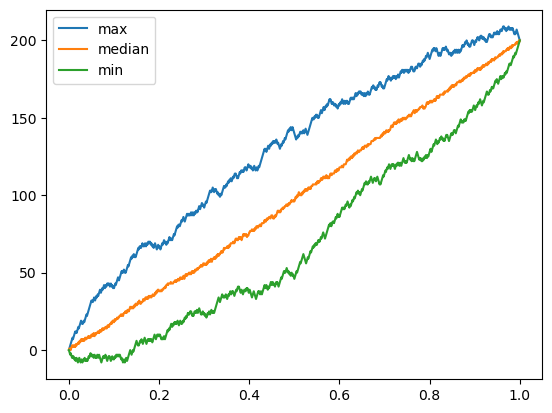

In [774]:
plt.plot(t, x.T,linewidth=0.3,alpha=1)
plt.show()
max = np.max(x,axis=0)
min = np.min(x,axis=0)
med = np.median(x,axis=0)
plt.plot(t, max,label="max")
plt.plot(t, med,label="median")
plt.plot(t, min,label="min")
plt.legend()
plt.show()

In [861]:
# find empirical distribution of intersection locations (with null path) and number of intersections
def intersection_density(Ns, M): 
    N = sum(Ns)
    intersections = np.zeros([M,N+1])
    for i in range(M):
        x = gillespie(Ns)
        j = np.arange(N+1) * (Ns[1] - Ns[2]) / N
        y = x - j
        # intersections[i,1:] = (np.sign(y[1:]) != np.sign(y[:-1]))
        intersections[i,1:] = (np.sign(y[1:]) == 0)
    inter_number = np.sum(intersections, axis = 1)
    inters = np.argwhere(intersections == 1).T[1] / N
    return inters, inter_number

In [869]:
Ns = [0, 100, 900] # N0, N+, N-
N = sum(Ns)
inters, inter_number = intersection_density(Ns = Ns, M = 10000)

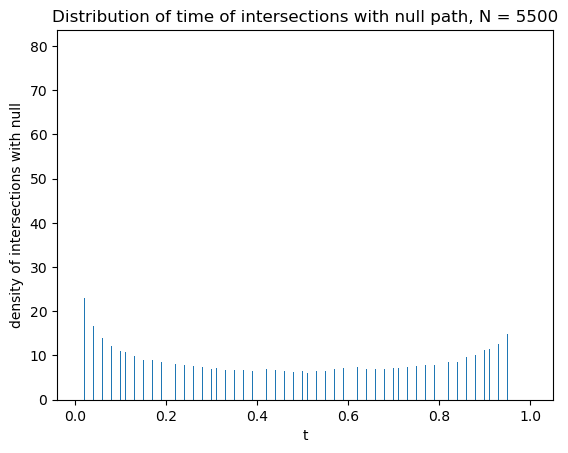

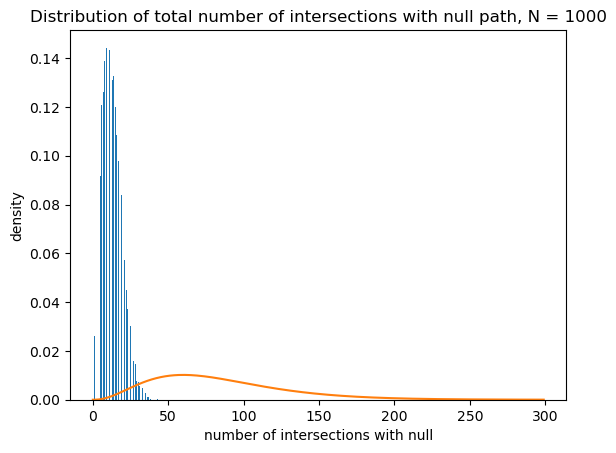

In [871]:
plt.hist(inters, bins = 1000, density = True)
plt.title(f"Distribution of time of intersections with null path, N = {5500}")
plt.xlabel("t")
plt.ylabel("density of intersections with null")
plt.show()

fig, ax = plt.subplots()
ax.hist(inter_number, bins = 100, density = True)
ax.set_title(f"Distribution of total number of intersections with null path, N = {N}")
ax.set_xlabel("number of intersections with null")
ax.set_ylabel("density")

# Gamma distribution guess
j = np.arange(300)
a = 3.5
gamma = st.gamma.pdf(j, a, scale = 60 / (a-1))
ax.plot(j,gamma)
plt.show()

In [778]:
mean_recurrences = 1 / inter_number
print(f'mean of mean recurrence times = {np.mean(mean_recurrences)}')

mean of mean recurrence times = 0.019053492503631635


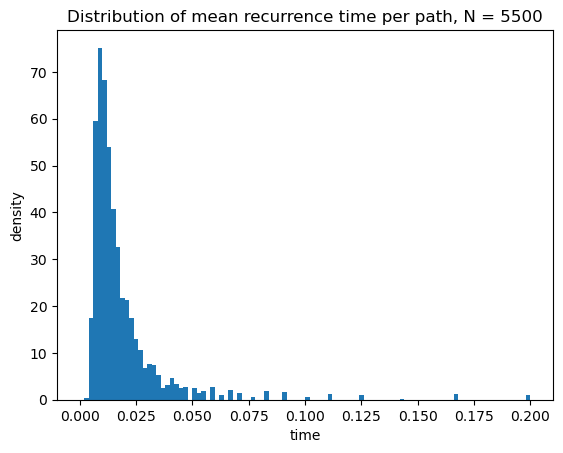

In [ ]:
fig, ax = plt.subplots()
ax.hist(mean_recurrences, bins = 100, density = True, range = [0,0.2])
ax.set_title(f"Distribution of mean recurrence time per path, N = {N}")
ax.set_xlabel("time")
ax.set_ylabel("density")
plt.show()

In [807]:
k = int(N/2)
random_inter, random_internum = intersection_density(Ns=[0, k, k], M = 10000)

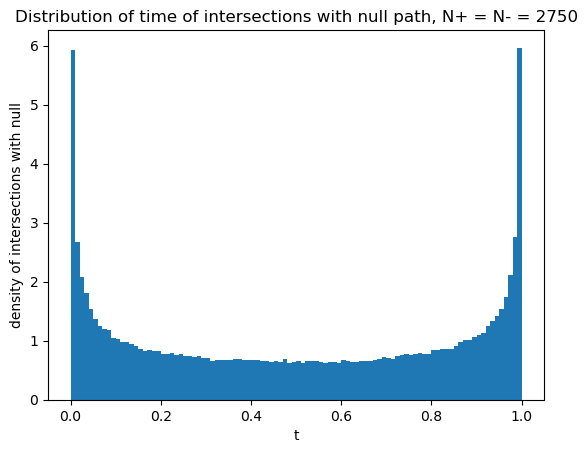

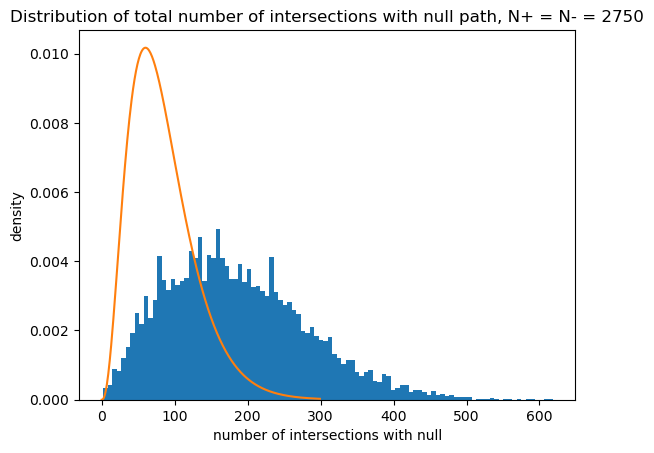

In [830]:
plt.hist(random_inter, bins = 100, density = True)
plt.title(f"Distribution of time of intersections with null path, N+ = N- = {k}")
plt.xlabel("t")
plt.ylabel("density of intersections with null")
plt.show()

fig, ax = plt.subplots()
ax.hist(random_internum, bins = 100, density = True)
ax.set_title(f"Distribution of total number of intersections with null path, N+ = N- = {k}")
ax.set_xlabel("number of intersections with null")
ax.set_ylabel("density")
ax.plot(j,gamma)
plt.show()

In [811]:
rand_mean_recurrences = 1 / random_internum
print(f'mean of mean recurrence times = {np.mean(rand_mean_recurrences)}')

mean of mean recurrence times = 0.00851917999827313


In [816]:
Ns = [0, 5000, 50000] # N0, N+, N-
N = sum(Ns)
big_inters, big_inter_number = intersection_density(Ns = Ns, M = 1000)

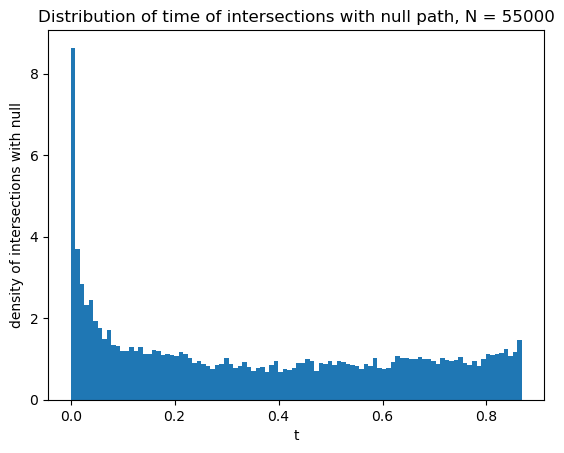

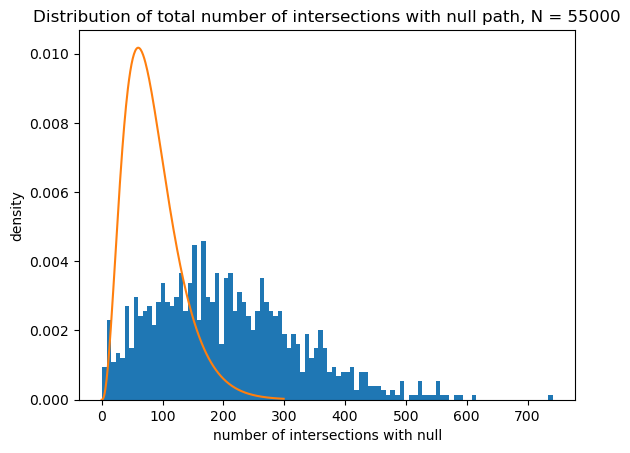

In [829]:
plt.hist(big_inters, bins = 100, density = True)
plt.title(f"Distribution of time of intersections with null path, N = {N}")
plt.xlabel("t")
plt.ylabel("density of intersections with null")
plt.show()

fig, ax = plt.subplots()
ax.hist(big_inter_number, bins = 100, density = True)
ax.set_title(f"Distribution of total number of intersections with null path, N = {N}")
ax.set_xlabel("number of intersections with null")
ax.set_ylabel("density")
ax.plot(j,gamma)
plt.show()

In [820]:
big_mean_recurrences = 1 / big_inter_number
print(f'mean of mean recurrence times = {np.mean(big_mean_recurrences)}')

mean of mean recurrence times = 0.011062506584279179


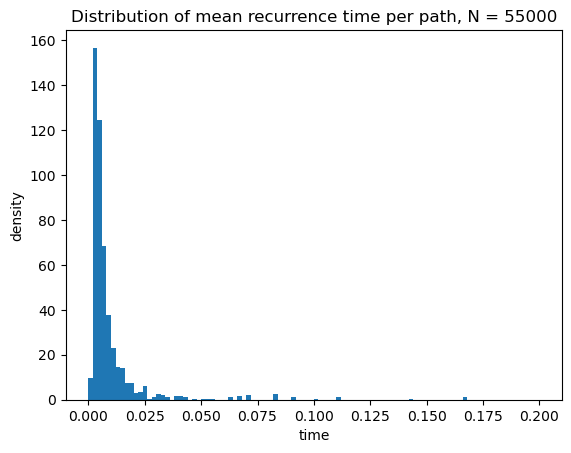

In [819]:
fig, ax = plt.subplots()
ax.hist(big_mean_recurrences, bins = 100, density = True, range = [0,0.2])
ax.set_title(f"Distribution of mean recurrence time per path, N = {N}")
ax.set_xlabel("time")
ax.set_ylabel("density")
plt.show()